In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os

import scipy.io
from scipy import stats
from scipy.signal import savgol_filter
import octopus as oct

In [5]:
# Import data
Rinput_TM_all_sub = np.load('Rinput_TM_all_sub.npy')
Rinput_PM_all_sub = np.load('Rinput_PM_all_sub.npy')
Rinput_TM_Split_all_sub = np.load('Rinput_TM_Split_all_sub.npy')
Rinput_PM_Split_all_sub = np.load('Rinput_PM_Split_all_sub.npy')
Rinput_TM_Split12_all_sub = np.load('Rinput_TM_Split12_all_sub.npy')
Rinput_PM_Split12_all_sub = np.load('Rinput_PM_Split12_all_sub.npy')
Rinput_PM_Split12_all_sw1_sub = np.load('Rinput_PM_Split12_all_sw1_sub.npy')

time = np.linspace(0, 7.99, 799)

In [7]:
# Sum different parts od visual arena
Rinput_PM_sum = (Rinput_PM_all_sub[:,:,0]) + (Rinput_PM_all_sub[:,:,1])
Rinput_PM_Split_sum = (Rinput_PM_Split_all_sub[:,:,0]) + (Rinput_PM_Split_all_sub[:,:,1])
Rinput_PM_Split12_sum = (Rinput_PM_Split12_all_sub[:,:,0]) + (Rinput_PM_Split12_all_sub[:,:,1])
Rinput_PM_Split12_sw1_sum = (Rinput_PM_Split12_all_sw1_sub[:,:,0]) + (Rinput_PM_Split12_all_sw1_sub[:,:,1])

#Merge identical stimuli
Rinput_PM_Split12_avg = (Rinput_PM_Split12_sum + Rinput_PM_Split12_sw1_sum) / 2
Rinput_TM_Split_avg = ((Rinput_TM_Split_all_sub[:,:,0]) + (Rinput_TM_Split_all_sub[:,:,1])) / 2

In [8]:
# Calculate average ND and PD conductances for split screen stimulus
Rinput_PM_Split12_all_ND = (Rinput_PM_Split12_all_sub[:,:,0] + Rinput_PM_Split12_all_sw1_sub[:,:,0]) / 2
Rinput_PM_Split12_all_PD = (Rinput_PM_Split12_all_sub[:,:,1] + Rinput_PM_Split12_all_sw1_sub[:,:,1]) / 2

In [9]:
# Calculate mean conductances
Rinput_TM_all_sub_mean = np.mean(Rinput_TM_all_sub[300:600,:],0)
Rinput_PM_all_sub_mean = np.mean(Rinput_PM_all_sub[300:600,:,:],0)
Rinput_PM_sum_mean = np.mean(Rinput_PM_sum[300:600],0)

Rinput_TM_Split12_all_sub_mean = np.mean(Rinput_TM_Split12_all_sub[300:600,:],0)
Rinput_PM_Split12_sum_mean = np.mean(Rinput_PM_Split12_sum[300:600],0)
Rinput_PM_Split12_avg_mean = np.mean(Rinput_PM_Split12_avg[300:600],0)

Rinput_PM_Split12_all_ND_mean = np.mean(Rinput_PM_Split12_all_ND[300:600],0)
Rinput_PM_Split12_all_PD_mean = np.mean(Rinput_PM_Split12_all_PD[300:600],0)

C:\Users\gammer\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\gammer\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\gammer\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


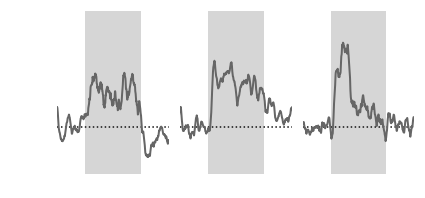

In [10]:
fig = plt.figure(figsize = (6.4,3))

plt.subplots_adjust(wspace = 0.1)

ax = fig.add_subplot(131)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time, savgol_filter(np.mean(Rinput_PM_all_sub[:,:,1],1),15,1), color = '0.4', linewidth = 2)
#plt.plot(time, savgol_filter((Rinput_PM_all_sub[:,:,1]),15,1), color = '0.4', alpha=0.1, linewidth = 1)
#plt.plot(time, savgol_filter(np.mean(voltage_PM_Split12_all_sub[:,:,1],1),15,1), color = 'C4', linewidth = 2)

plt.axvspan(3, 6, facecolor='0.2', alpha=0.2)
plt.xlim([1.5,7.5])
plt.ylim([-0.0002, 0.0005])
plt.axis('off')

ax = fig.add_subplot(132)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time, savgol_filter(np.mean(Rinput_PM_all_sub[:,:,0],1),15,1), color = '0.4', linewidth = 2)
#plt.plot(time, savgol_filter(np.mean(voltage_PM_Split12_all_sub[:,:,0],1),15,1), color = 'C4', linewidth = 2)

plt.axvspan(3, 6, facecolor='0.2', alpha=0.2)
plt.xlim([1.5,7.5])
plt.ylim([-0.0002, 0.0005])
plt.axis('off')

ax = fig.add_subplot(133)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time, savgol_filter(np.mean(Rinput_TM_all_sub,1),15,1), color = '0.4', linewidth = 2)
#plt.plot(time, savgol_filter(np.mean(voltage_TM_Split12_all_sub,1),15,1), color = 'C4', linewidth = 2)

plt.axvspan(3, 6, facecolor='0.2', alpha=0.2)
plt.xlim([1.5,7.5])
plt.ylim([-0.0002, 0.0005])
plt.axis('off') 

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#Fig7_VS_TM_local_ephys_conductance_traces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

C:\Users\gammer\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\gammer\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\gammer\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


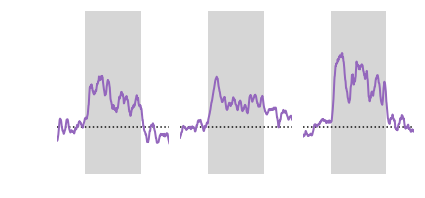

In [11]:
fig = plt.figure(figsize = (6.4,3))

plt.subplots_adjust(wspace = 0.1)

ax = fig.add_subplot(131)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
#plt.plot(time, savgol_filter(np.mean(Rinput_PM_all_sub[:,:,1],1),11,1), color = '0.4', linewidth = 2)
plt.plot(time, savgol_filter(np.mean(Rinput_PM_Split12_all_PD,1),15,1), color = 'C4', linewidth = 2)

plt.axvspan(3, 6, facecolor='0.2', alpha=0.2)
plt.xlim([1.5,7.5])
plt.ylim([-0.0002, 0.0005])
plt.axis('off')

ax = fig.add_subplot(132)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
#plt.plot(time, savgol_filter(np.mean(Rinput_PM_all_sub[:,:,0],1),11,1), color = '0.4', linewidth = 2)
plt.plot(time, savgol_filter(np.mean(Rinput_PM_Split12_all_ND,1),15,1), color = 'C4', linewidth = 2)

plt.axvspan(3, 6, facecolor='0.2', alpha=0.2)
plt.xlim([1.5,7.5])
plt.ylim([-0.0002, 0.0005])
plt.axis('off')

ax = fig.add_subplot(133)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
#plt.plot(time, savgol_filter(np.mean(Rinput_TM_all_sub,1),11,1), color = '0.4', linewidth = 2)
plt.plot(time, savgol_filter(np.mean(Rinput_TM_Split12_all_sub,1),15,1), color = 'C4', linewidth = 2)

plt.axvspan(3, 6, facecolor='0.2', alpha=0.2)
plt.xlim([1.5,7.5])
plt.ylim([-0.0002, 0.0005])
plt.axis('off') 

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#Fig7_VS_split_global_ephys_conductance_traces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

C:\Users\gammer\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\gammer\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


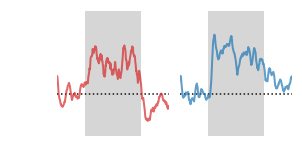

In [12]:
fig = plt.figure(figsize = (6.4,2.3))

plt.subplots_adjust(wspace = 0.1)

ax = fig.add_subplot(131)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time, savgol_filter(np.mean(Rinput_PM_all_sub[:,:,1],1),15,1), color = 'C3', alpha = 0.7, linewidth = 2)
#plt.plot(time, savgol_filter((Rinput_PM_all_sub[:,:,1]),15,1), color = '0.4', alpha=0.1, linewidth = 1)
#plt.plot(time, savgol_filter(np.mean(voltage_PM_Split12_all_sub[:,:,1],1),15,1), color = 'C4', linewidth = 2)

plt.axvspan(3, 6, facecolor='0.2', alpha=0.2)
plt.xlim([1.5,7.5])
plt.ylim([-0.0002, 0.0004])
plt.axis('off')

ax = fig.add_subplot(132)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time, savgol_filter(np.mean(Rinput_PM_all_sub[:,:,0],1),15,1), color = 'C0', alpha = 0.7, linewidth = 2)
#plt.plot(time, savgol_filter(np.mean(voltage_PM_Split12_all_sub[:,:,0],1),15,1), color = 'C4', linewidth = 2)

plt.axvspan(3, 6, facecolor='0.2', alpha=0.2)
plt.xlim([1.5,7.5])
plt.ylim([-0.0002, 0.0004])
plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#FigSX_VS_PDvsND_local_ephys_conductance_traces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [13]:
# local PD+ND sum vs. local TM

print(stats.shapiro(Rinput_TM_all_sub_mean))
print(stats.shapiro(Rinput_PM_sum_mean))
print(stats.levene(Rinput_TM_all_sub_mean, Rinput_PM_sum_mean))
print(stats.wilcoxon(Rinput_TM_all_sub_mean, Rinput_PM_sum_mean))

(0.6802077293395996, 0.0001029854392982088)
(0.7855320572853088, 0.001761077088303864)
LeveneResult(statistic=3.108508757666642, pvalue=0.08806934777135457)
WilcoxonResult(statistic=9.0, pvalue=0.002282193441519148)


In [14]:
# global PD+ND sum vs. global TM

print(stats.shapiro(Rinput_TM_Split12_all_sub_mean))
print(stats.shapiro(Rinput_PM_Split12_avg_mean))
print(stats.levene(Rinput_TM_Split12_all_sub_mean, Rinput_PM_Split12_avg_mean))
print(stats.wilcoxon(Rinput_TM_Split12_all_sub_mean, Rinput_PM_Split12_avg_mean))

(0.7493762969970703, 0.0006243873503990471)
(0.896782636642456, 0.07139323651790619)
LeveneResult(statistic=0.13706975937676733, pvalue=0.7138127397468177)
WilcoxonResult(statistic=53.0, pvalue=0.43796657516602056)


In [15]:
# local TM vs. global TM
print(stats.wilcoxon(Rinput_TM_all_sub_mean, Rinput_TM_Split12_all_sub_mean))

WilcoxonResult(statistic=22.0, pvalue=0.017378363446698287)


In [16]:
# Figure parameters
fw = 0.4 # width of figure

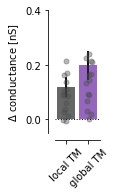

In [17]:
# Make Scatter Plot of conductance for local vs. global opponent motion

pos = [0,1]

fig = plt.figure(figsize = (fw*len(pos),2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [Rinput_TM_all_sub_mean, Rinput_TM_Split12_all_sub_mean]
colors = ['0.4', 'C4']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), yerr=[stats.sem(data[j])], color=colors[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.4, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('local TM','global TM'), rotation=45, size=10)
ax.set_ylabel('$\Delta$ conductance [nS]', size=10)

yticks = np.array([0, 0.0002, 0.0004])
ax.set_yticklabels([0.0, 0.2, 0.4], size=10)
ax.set_yticks(yticks)
plt.ylim([-0.00005,0.0004])

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#Fig7_Conductance_local_global_ephys_barplot_zoom.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

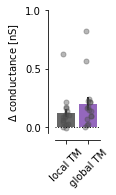

In [18]:
# Make Scatter Plot of conductance for local vs. global opponent motion

pos = [0,1]

fig = plt.figure(figsize = (fw*len(pos),2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [Rinput_TM_all_sub_mean, Rinput_TM_Split12_all_sub_mean]
colors = ['0.4', 'C4']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), yerr=[stats.sem(data[j])], color=colors[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.4, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('local TM','global TM'), rotation=45, size=10)
ax.set_ylabel('$\Delta$ conductance [nS]', size=10)

yticks = np.array([0, 0.0005, 0.0010])
ax.set_yticklabels([0.0, 0.5, 1.0], size=10)
ax.set_yticks(yticks)
plt.ylim([-0.00005,0.0010])

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#Fig7_Conductance_local_global_ephys_barplot_all.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [19]:
np.mean(Rinput_TM_all_sub_mean) / np.mean(Rinput_TM_Split12_all_sub_mean)

0.5987327183955766

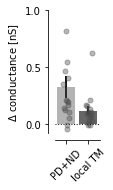

In [20]:
# Make Scatter Plot of conductnace for local PD+ND sum vs. local opponent motion

pos = [0,1]

fig = plt.figure(figsize = (fw*len(pos),2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [Rinput_PM_sum_mean, Rinput_TM_all_sub_mean]
colors = ['0.7', '0.4']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), yerr=[stats.sem(data[j])], color=colors[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.4, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('PD+ND','local TM'), rotation=45, size=10)
ax.set_ylabel('$\Delta$ conductance [nS]', size=10)
yticks = np.array([0, 0.0005, 0.001, 0.0015])
ax.set_yticklabels([0.0, 0.5, 1.0, 1.5], size=10)
ax.set_yticks(yticks)
plt.ylim([-0.000075,0.001])

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#Fig7_Conductance_TM_PDND_ephys_barplot_zoom.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

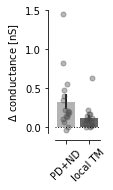

In [21]:
# Make Scatter Plot of conductnace for local PD+ND sum vs. local opponent motion

pos = [0,1]

fig = plt.figure(figsize = (fw*len(pos),2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [Rinput_PM_sum_mean, Rinput_TM_all_sub_mean]
colors = ['0.7', '0.4']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), yerr=[stats.sem(data[j])], color=colors[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.4, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('PD+ND','local TM'), rotation=45, size=10)
ax.set_ylabel('$\Delta$ conductance [nS]', size=10)
yticks = np.array([0, 0.0005, 0.001, 0.0015])
ax.set_yticklabels([0.0, 0.5, 1.0, 1.5], size=10)
ax.set_yticks(yticks)
plt.ylim([-0.000075,0.0015])

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#Fig7_Conductance_TM_PDND_ephys_barplot_all.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

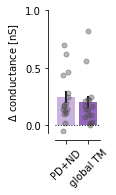

In [22]:
# Make Scatter Plot of conductance for PDND vs. Split (global opponent) motion

pos = [0,1]

fig = plt.figure(figsize = (fw*len(pos),2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [Rinput_PM_Split12_avg_mean, Rinput_TM_Split12_all_sub_mean]
colors = ['C4', 'C4']
alphas = ([0.5, 1])

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), yerr=[stats.sem(data[j])], color=colors[j], alpha=alphas[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.4, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('PD+ND','global TM'), rotation=45, size=10)
ax.set_ylabel('$\Delta$ conductance [nS]', size=10)
yticks = np.array([0, 0.0005, 0.001])
ax.set_yticklabels([0.0, 0.5, 1.0], size=10)
ax.set_yticks(yticks)
plt.ylim([-0.000066,0.001])

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#Fig7_Conductance_split_PDND_ephys_barplot.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

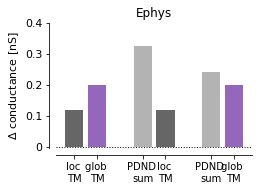

In [23]:
# Make Scatter Plot of modelling conductance (Split global: PD+ND vs. Split)

pos = [0,1,3,4,6,7]

fig = plt.figure(figsize = (1.4 * len(pos),2.3))
plt.subplots_adjust(wspace = 0.4)

ax = fig.add_subplot(121)
w = 0.6
wb = 0.6
data = [Rinput_TM_all_sub_mean, Rinput_TM_Split12_all_sub_mean,
        Rinput_PM_sum_mean, Rinput_TM_all_sub_mean,
        Rinput_PM_Split12_avg_mean, Rinput_TM_Split12_all_sub_mean]

colors = ['0.4', 'C4', '0.7', '0.4', '0.7', 'C4']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), color=colors[j])
    #ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    #for i in range(len(data[j])):
        #ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.4, zorder = 2)
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('loc \nTM','glob \nTM', 'PDND \nsum', 'loc \nTM', 'PDND \nsum', 'glob \nTM'), size=10)
ax.set_ylabel(r'$\Delta$'+ ' conductance [nS]', size=11)
yticks = np.array([0, 0.0001, 0.0002, 0.0003, 0.0004])
ax.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], size=11)
ax.set_yticks(yticks)
plt.ylim([-0.000005,0.0004])
plt.title('Ephys')

plt.show()

In [24]:
stats.wilcoxon(Rinput_PM_all_sub_mean[:,0], Rinput_PM_all_sub_mean[:,1])

WilcoxonResult(statistic=49.0, pvalue=0.32587002429697964)

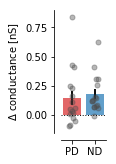

In [25]:
# Make Scatter Plot of conductance for PDND vs. Split (global opponent) motion

pos = [0,1]

fig = plt.figure(figsize = (fw*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [Rinput_PM_all_sub_mean[:,1], Rinput_PM_all_sub_mean[:,0]]
colors = ['C3', 'C0']
alphas = ([0.7, 0.7])

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), yerr=[stats.sem(data[j])], color=colors[j], alpha=alphas[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.4, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('PD','ND'), size=10)
ax.set_ylabel('$\Delta$ conductance [nS]', size=10)
yticks = np.array([0, 0.00025, 0.0005, 0.00075])
ax.set_yticklabels(['0.00', '0.25', '0.50', '0.75'], size=10)
ax.set_yticks(yticks)
#plt.ylim([-0.000066,0.00035])

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#Fig3_Conductance_PD_vs_ND_local_barplot.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

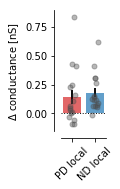

In [26]:
# Make Scatter Plot of conductance for PDND vs. Split (global opponent) motion

pos = [0,1]

fig = plt.figure(figsize = (fw*len(pos), 2.23))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [Rinput_PM_all_sub_mean[:,1], Rinput_PM_all_sub_mean[:,0]]
colors = ['C3', 'C0']
alphas = ([0.7, 0.7])

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), yerr=[stats.sem(data[j])], color=colors[j], alpha=alphas[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.4, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('PD local','ND local'), rotation=45, size=10)
ax.set_ylabel('$\Delta$ conductance [nS]', size=10)
yticks = np.array([0, 0.00025, 0.0005, 0.00075])
ax.set_yticklabels(['0.00', '0.25', '0.50', '0.75'], size=10)
ax.set_yticks(yticks)
#plt.ylim([-0.000066,0.001])

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#FigS3_Conductance_PD_vs_ND_local_barplot.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [27]:
stats.wilcoxon(Rinput_PM_all_sub_mean[:,1], Rinput_PM_all_sub_mean[:,0])

WilcoxonResult(statistic=49.0, pvalue=0.32587002429697964)

In [28]:
NDPD_local_g_ratio = np.mean(Rinput_PM_all_sub_mean[:,0]) / np.mean(Rinput_PM_all_sub_mean[:,1])
gi_syn_ratio_local = NDPD_local_g_ratio * (2065.0 / 239.0)
print(NDPD_local_g_ratio)
print(gi_syn_ratio_local)

1.2571577031198893
10.862052957918708


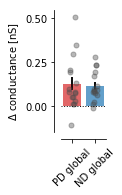

In [62]:
# Make Scatter Plot of conductance for PDND vs. Split (global opponent) motion

pos = [0,1]

fig = plt.figure(figsize = (fw*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [Rinput_PM_Split12_all_PD_mean, Rinput_PM_Split12_all_ND_mean]
colors = ['C3', 'C0']
alphas = ([0.7, 0.7])

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), yerr=[stats.sem(data[j])], color=colors[j], alpha=alphas[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.4, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('PD global','ND global'), rotation=45, size=10)
ax.set_ylabel('$\Delta$ conductance [nS]', size=10)
yticks = np.array([0, 0.00025, 0.0005])
ax.set_yticklabels(['0.00', '0.25', '0.50'], size=10)
ax.set_yticks(yticks)
#plt.ylim([-0.000066,0.001])

bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
FigS3_Conductance_PD_vs_ND_global_barplot.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [29]:
stats.wilcoxon(Rinput_PM_Split12_all_PD_mean, Rinput_PM_Split12_all_ND_mean)

WilcoxonResult(statistic=59.0, pvalue=0.6416601266046645)

In [30]:
NDPD_global_g_ratio = np.mean(Rinput_PM_Split12_all_ND_mean) / np.mean(Rinput_PM_Split12_all_PD_mean)
gi_syn_ratio_global = NDPD_global_g_ratio * (2065.0 / 239.0)
print(NDPD_global_g_ratio)
print(gi_syn_ratio_global)

0.8853369086395647
7.649459064187035
